# Covid-19 Pandemic Context

__Covid-19 Origin__

The Covid-19 pandemic started by a coronavirus named SARS-CoV-2 where "SARS" means _Severe Acute Respiratory Syndrome_ and "CoV" means Coronavirus which is a family of viruses (e.g. Covid-19, SARS-CoV-2, MERS-CoV). SARS-CoV-2, the virus responsible for COVID-19, belongs to a group of genetically related
viruses that includes SARS-CoV, the cause of the SARS outbreak in 2003, and a number of other CoVs isolated from bat populations. The first human cases of COVID-19, the coronavirus disease caused by SARS-CoV-2, were first reported from Wuhan City, China, in December 2019. 

Source: https://apps.who.int/iris/bitstream/handle/10665/332197/WHO-2019-nCoV-FAQ-Virus_origin-2020.1-eng.pdf

__SARS-CoV-2 Variants__

All viruses change over time. Some changes may affect the virus’s properties, such as how easily it spreads, the associated disease severity, or the performance of vaccines, therapeutic medicines, diagnostic tools, or other public health and social measures. During late 2020, the emergence of variants that posed an increased risk to global public health prompted the characterisation of specific Variants of Interest (VOIs) and Variants of Concern (VOCs). At the present time, the expert group convened by WHO has recommended using letters of the Greek Alphabet, i.e., Alpha, Beta, Gamma, Delta which will be easier and more practical to be discussed by non-scientific audiences.

Source: https://www.who.int/en/activities/tracking-SARS-CoV-2-variants/

__Safety Measures__

While the COVID-19 is continuing to propagate around the world, safety measures have been enforced in many countries in order to reduce the propagation of the virus between people. Some countries applied safety measures like social distancing, partial closing of non-essential services or stores, limitation of people in stores, wearing a mask mainly in close spaces, desinfection of hands, curfew and many other measures. However, scientifics have developed vaccines (e.g. Moderna, Pfizer) to reduce the virus effects and then reduce the risk of hospitalizations and deaths.

# Objective
The main objective is to understand how it is going in countries around the world and find any insights or key factors that could be useful to understand the virus propagation and the damages and benefits it causes.  

This objective is vast and is split in many questions:
- What are the effects of the poverty on the Covid-19 tests, deaths and vaccinations?
- What are the countries with the greatest percentage of vaccinated people and does it has an effect on the number of confirmed Covid-19 cases and deaths?
- Which countries has the greatest percentage of deaths over the confirmed Covid-19 cases and is it related to the poverty?
- Which vaccine manufacturer is prefered (e.g. Pfizer, Moderna)? 
- Are there moments when a vaccine manufacturer was used more than the others?
- Does the population density has an effect on the number of confirmed cases and deaths?

- Among a population, is there a gender that is more susceptible to be infected by the Covid-19 or die from the virus?
- What groups of ages are mostly susceptible to be infected by the Covid-19? Are there similar in every countries? 
- What diseases or physical problems (e.g. obesity) are mostly deadly for people if they are infected by the Covid-19?
- What is the effect of the pandemic on the air quality?
- How does the pandemic affect the technology market? Is it beneficial or not? 
- What is the pandemic effects on people psychology in terms of depressions, crimes, domestic violence?
- What is the pandemic effects on divorces and mariages?
- Does the pandemic has any effects on the birth rate?
- Is the Covid-19 affected by the temperature or meteo in general?

# Datasets Gathering and Preparation
The datasets provided on Covid-19 (confirmed cases, deaths, vaccinations, hospitalizations, etc.) are an __approximation of the reality__. Many reasons could explain that approximation like human mistakes, technologic problems, lack of tools because its too expensive, some people do not want to be tested, holidays, war, etc.

The source of data used comes from _Our World In Data (OWID)_ https://github.com/owid/covid-19-data and _World Health Organization (WHO)_ https://www.who.int/data.

In [1]:
'''
ONLY for those who use Google Colab with Google Drive. 
Mount your Google Drive repository and select the folder where your files are located.
If using your hard drive with local host, remove this section of code.
'''
from google.colab import drive

drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab\ Notebooks/Covid19
PATH = "/content/drive/MyDrive/Colab\ Notebooks/Covid19"

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Covid19


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Import *.py files
import Utils

# Data source classes
from CasesAndDeathsDataset import CasesAndDeathsDataset
from StringencyDataset import StringencyDataset
from CountriesDataset import CountriesDataset
from HospitalizationsDataset import HospitalizationsDataset
from VaccinationsDataset import VaccinationsDataset
from VaccinationsByAgeDataset import VaccinationsByAgeDataset
from VaccinationsByManufacturerDataset import VaccinationsByManufacturerDataset
from TestsDataset import TestsDataset
from SummaryDataset import SummaryDataset
from TopCountriesDashboardBuilder import TopCountriesDashboardBuilder
from StatsDataset import StatsDataset
from DashboardUI import DashboardUI
from StatsDashboardBuilder import StatsDashboardBuilder
from WorldMapDashboardBuilder import WorldMapDashboardBuilder

## Countries
The sources of data for countries are:
- Total population by country: https://github.com/owid/covid-19-data/tree/master/scripts/input/un 
- Poverty percentage by country: https://www.who.int/data/gho/data/indicators/indicator-details/GHO/proportion-of-population-below-the-international-poverty-line-of-us$1-90-per-day-(-)
- Population density by country: https://github.com/owid/owid-datasets/tree/master/datasets/Population%20density%20(World%20Bank%2C%20Gapminder%2C%20HYDE%20%26%20UN) 

In [3]:
countries_dataset = CountriesDataset()
countries_dataset.prepare()

## Vaccinations
The source of the datasets and features description is given here: https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations. The source contents:
- Vaccinations (first, second and third doses, etc.);
- Vaccinations by age group;
- Vaccinations by manufacturer (Pfizer, Moderna, etc.).

In [4]:
vaccinations_dataset = VaccinationsDataset()
vaccinations_dataset.prepare()

In [5]:
vaccinations_by_age_dataset = VaccinationsByAgeDataset()
vaccinations_by_age_dataset.prepare(countries_dataset)

In [6]:
vaccinations_by_manufacturer_dataset = VaccinationsByManufacturerDataset()
vaccinations_by_manufacturer_dataset.prepare(countries_dataset)

## Confirmed Cases and Deaths
The source of the dataset and features description are given here: https://github.com/owid/covid-19-data/tree/master/scripts/input/jhu. 

In [7]:
cases_deaths_dataset = CasesAndDeathsDataset()
cases_deaths_dataset.prepare(countries_dataset)

## Stringency
The source of the dataset and features description are given here: https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv.

In [8]:
stringency_dataset = StringencyDataset()
stringency_dataset.prepare()

## Tests
The source of data comes from: https://github.com/owid/covid-19-data/tree/master/public/data/testing and the explanations of features: https://ourworldindata.org/coronavirus-testing#source-information-country-by-country.

The __positive rate__ (noted $\Delta T^+(t)$), function of the time $t$, is mainly calculated by taking the 7-day rolling average of daily new cases divided by the 7-day rolling average of the daily new tests. We express this as:
$$
\Delta T^+(t) = \frac{\mu_7(\Delta C(t))}{\mu_7(\Delta T(t))}
$$

The tests per cases feature is calculated as:
$$
T_C(t) = \frac{1}{\Delta T^+(t)}.
$$

In [9]:
tests_dataset = TestsDataset()
tests_dataset.prepare(countries_dataset, cases_deaths_dataset)

## Hospitalizations
The source of the dataset and features description are given here: https://github.com/owid/covid-19-data/tree/master/public/data/hospitalizations.

In [10]:
hospitalizations_dataset = HospitalizationsDataset()
hospitalizations_dataset.prepare()

# Dashboard
The dashboards present a summary visualization of the cases, deaths, vaccinations and hospitalizations to know the history progression of the Covid-19 by region. A dropdown list is added in order to select the region's dashboard to visualize. 

The objective is to display dynamically a dashboard based on a region (could be a country or the world) selected in a dropdown list. The dashboard presents:
- The world bubble map showing the number of cases and deaths.
- The cumulative number of cases and death;
- The new daily cases and deaths;
- The percentages of people not vaccinated, with only the first dose, with first and second doses, and with all 3 doses;
- The number of people vaccinated with at least one dose, at least 2 doses and all 3 doses;
- The cumulative total number of vaccins administrated;
- The new daily number of vaccins administrated;
- The cumulative number of people vaccinated with at least one dose, at least 2 doses and all 3 doses;
- The new daily number of first dose administrated;
- The new daily number of people hospitalized and intensive care (ICU);
- The number of people hospitalized per million people;
- The number of vaccins administrated per manufacturer (e.g. Moderna, Pfizer);
- The number of vaccins (first, second and third doses) administrated per age group (e.g. 0-17 years old, 18-25 years old).


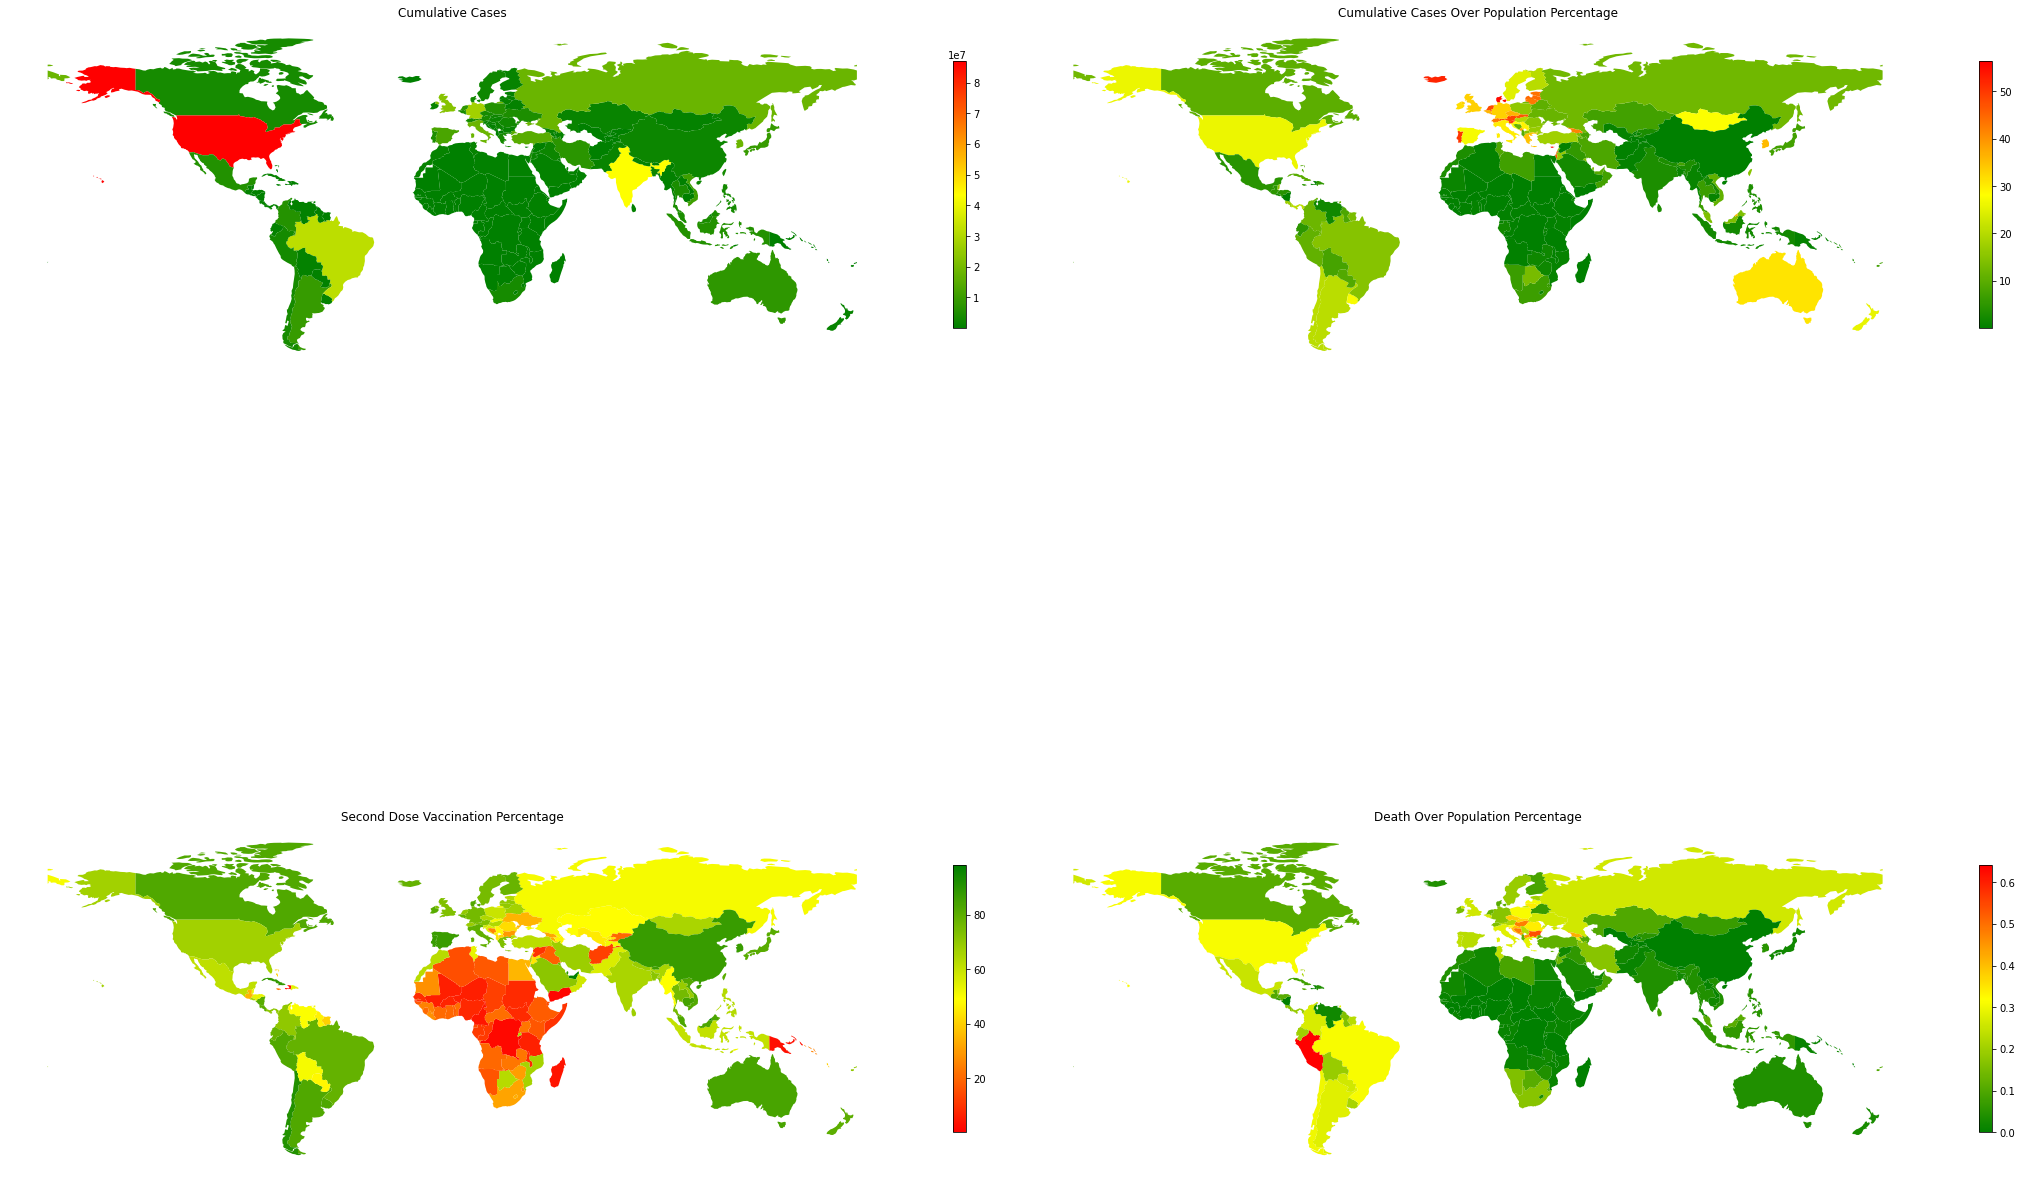

In [11]:
datasets = {
    'countries': countries_dataset,
    'cases_and_deaths': cases_deaths_dataset,
    'stringency': stringency_dataset,
    'vaccinations': vaccinations_dataset,
    'vaccinations_by_age': vaccinations_by_age_dataset,
    'vaccinations_by_manufacturer': vaccinations_by_manufacturer_dataset,
    'hospitalizations': hospitalizations_dataset,
    'tests': tests_dataset
}

summary_dataset = SummaryDataset()
summary_dataset.prepare(datasets)
datasets['summary'] = summary_dataset

world_map = WorldMapDashboardBuilder(datasets['summary'].dataset)
world_map.build()

In [12]:
dashboard_ui = DashboardUI(datasets)
dashboard_ui.show()

Dropdown(description='Dashboard', options=('(Select a dashboard)', 'Summary', 'Cases and deaths', 'Vaccination…

Dropdown(description='Entity', options=(('(Select an entity)', '-'),), value='-')

Button(description='Display Dashboard', style=ButtonStyle(), tooltip='Display a dashboard based on the country…

We have to consider that some countries like China, Australia and New-Zelend seem to have dropped severe safety measures since the Covid variant Omicron. This variant is more virulent but less dangerous for the health. 

# Cases and Deaths Report
Based on the selection of a sort, we display a table with cases and deaths data to rank countries. With Jupyter notebook in Google Colab, the table can be sorted by any column and filtered including a paging navigation. The dropdown list is useless in such a case.

In [13]:
report = summary_dataset.dataset.loc[:,['entity', 'cumulative_cases', 'cumulative_deaths', 'population', 'cases_over_pop_%', 'deaths_over_pop_%', 'deaths_over_cases_%']]
display(report.sort_values(by=['cumulative_cases'], ascending=False))

,entity,cumulative_cases,cumulative_deaths,population,cases_over_pop_%,deaths_over_pop_%,deaths_over_cases_%
180,United States,86967639,1015938,3.329151e+08,26.12,0.31,1.17
78,India,43407046,525020,1.393409e+09,3.12,0.04,1.21
24,Brazil,32023166,670229,2.139934e+08,14.96,0.31,2.09
59,France,30714200,150356,6.742200e+07,45.56,0.22,0.49
45,Germany,27771911,140734,8.390047e+07,33.10,0.17,0.51
...,...,...,...,...,...,...,...
92,Kiribati,3236,13,1.213880e+05,2.67,0.01,0.40
60,Micronesia,38,0,1.162550e+05,0.03,0.00,0.00
182,Holy See,29,0,8.120000e+02,3.57,0.00,0.00
112,Marshall Islands,18,0,5.961800e+04,0.03,0.00,0.00


# Top Countries

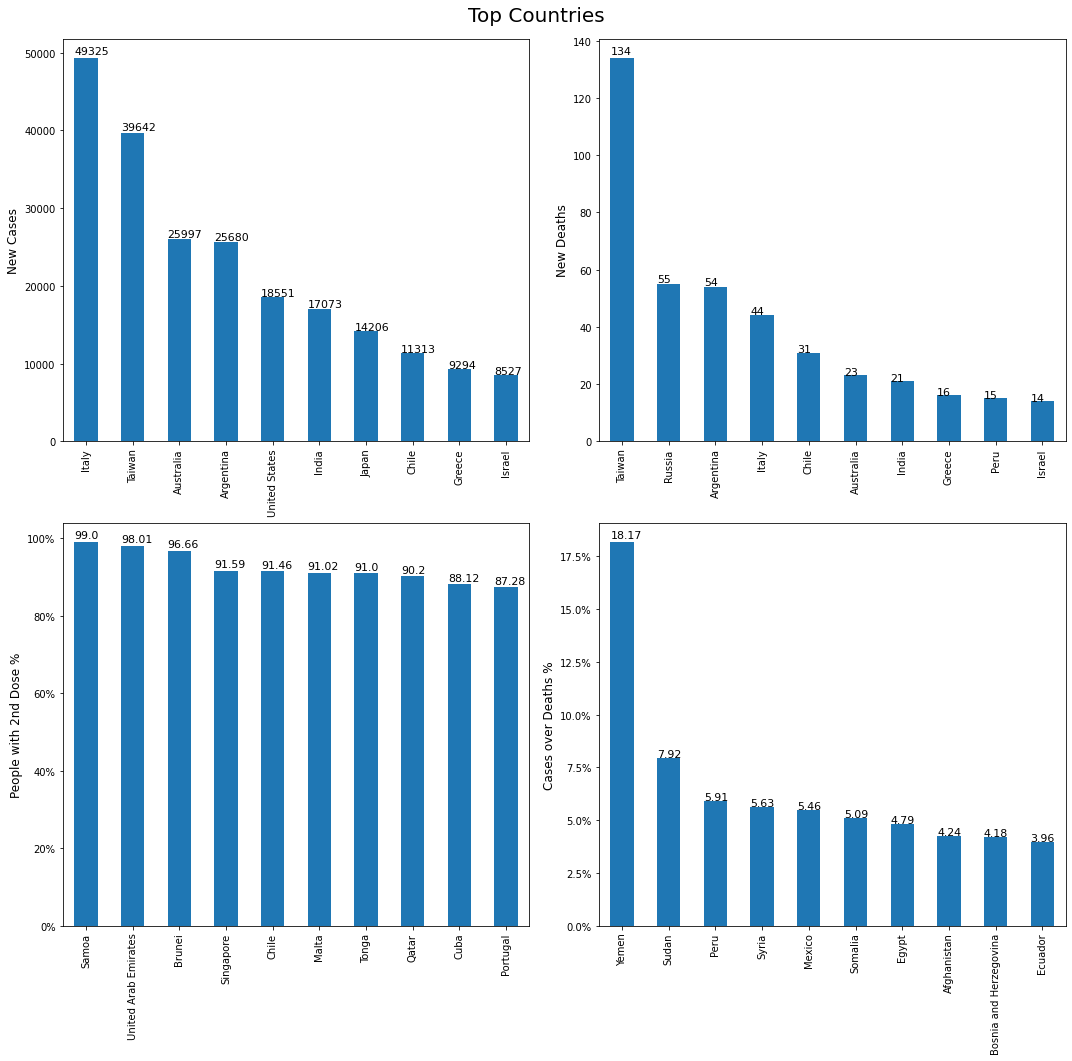

In [14]:
top_countries = TopCountriesDashboardBuilder(summary_dataset)
top_countries.build()

# Statistical Analysis
The objective of this section is to validate or invalidate hypotheses that we will state based on the country's poverty percentage, the percentage of cases and deaths over the population and the vaccinations.

## Observations
We use a correlation matrix to determine if the correlation between features are strong ($|r| \geq 0.75$), significant ($0.4 \leq |r| < 0.75$) or not significant ($|r| < 0.4$).

In [15]:
stats_dataset = StatsDataset()
stats_dataset.prepare(datasets)
correlation_matrix = stats_dataset.correlationMatrix()
display(correlation_matrix)

,cumulative_cases,cumulative_deaths,new_cases,new_deaths,poverty_%,density,cases_over_pop_%,deaths_over_pop_%,people_1st_dose_%
cumulative_cases,1.00,0.90,0.39,0.18,-0.20,-0.03,0.19,0.22,0.25
cumulative_deaths,0.90,1.00,0.32,0.19,-0.17,-0.04,0.06,0.30,0.20
new_cases,0.39,0.32,1.00,0.78,-0.14,0.01,0.12,0.07,0.25
new_deaths,0.18,0.19,0.78,1.00,-0.15,-0.03,0.05,0.08,0.19
poverty_%,-0.20,-0.17,-0.14,-0.15,1.00,-0.06,-0.51,-0.49,-0.62
density,-0.03,-0.04,0.01,-0.03,-0.06,1.00,0.13,-0.02,0.11
cases_over_pop_%,0.19,0.06,0.12,0.05,-0.51,0.13,1.00,0.54,0.49
deaths_over_pop_%,0.22,0.30,0.07,0.08,-0.49,-0.02,0.54,1.00,0.25
people_1st_dose_%,0.25,0.20,0.25,0.19,-0.62,0.11,0.49,0.25,1.00


Form this correletion matrix, we observe the following points:
- __Strong correlation between the cumulative deaths and cases between countries.__ We know that the number of deaths represents most of the time a low percentage (between $0\%$ and $3\%$) of the number of cases. This explains why the correlation is strong.
- __Significant correlation between the poverty percentage and the percentage of cases and deaths over the population.__ It would make sense that if the percentage of poverty increases, the percentage of cases (or deaths) over the population decreases. Countries that are poor cannot afford to buy enough Covid tests and may not have the tools and proper buildings to proceed to the tests. Therefore, they probably report only a low percentage of positive cases because a low percentage of people are tested.
- __Significant correlation between the poverty percentage and the percentage of people vaccinated.__ It would make sense that if the percentage of poverty increases, the percentage of of people vaccinated decreases. Countries that are poor cannot afford to buy enough vaccines for their entire population which explains why the percentage is low.
- __Significant correlation between the percentage of people vaccinated and the percentage of cases over the population.__ This could be explained by countries droping or reducing safety measures as people get more and more vaccinated.

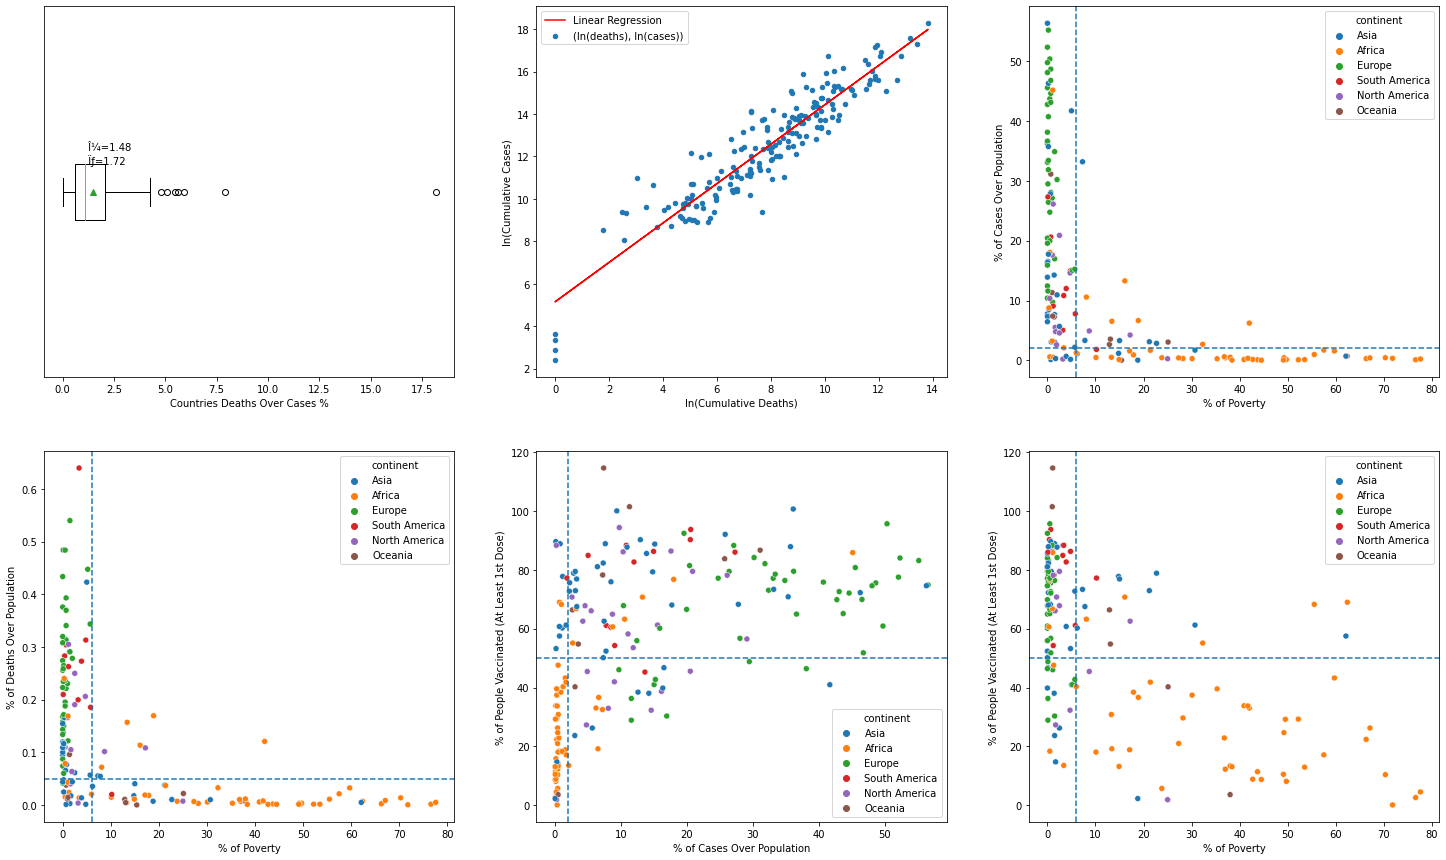

In [16]:
stats_dashboard = StatsDashboardBuilder(stats_dataset.dataset)
stats_dashboard.build()
europe_first_dose_cases_pop = round(stats_dataset.europeFirstDoseAgainstCasesOverPopulation(), 2)
africa_first_dose_cases_pop = round(stats_dataset.africaFirstDoseAgainstCasesOverPopulation(), 2)
first_dose_poverty = round(stats_dataset.firstDoseAgainstPoverty(), 2)
deaths_over_pop_poverty = round(stats_dataset.deathsOverPopulationAgainstPoverty(), 2)
cases_over_pop_poverty = round(stats_dataset.casesOverPopulationAgainstPoverty(), 2)

The poverty has a major impact on vaccinations, cases and deaths. Most of Africa's countries have a high poverty percentage and their cases, deaths and vaccination rates are low. 

__Vaccinations Against Poverty__

Each dose of vaccine has a monetary cost dependently of the country and the manufacturer (e.g. $19.50 per dose of Pfizer in United States). It then makes sense that poor countries cannot afford vaccines for the entire population. This explains why the vaccination rate is much lower in poor countries.



In [17]:
#@title
Markdown(f"There are {first_dose_poverty}% of Africa's countries with at least 6% of poverty where less than 50% of people have their first dose.")

There are 70.37% of Africa's countries with at least 6% of poverty where less than 50% of people have their first dose.

__Cases and Deaths Against Poverty__

To confirm that a person is infected by the Covid-19, the person must test positive to the virus. However, each test has a monetary cost because centres where people get their tests and staff are necessary. They also need to record the results in a database system. Poor countries cannot afford to test all people with few Covid-19 symptomes because its too expensive. The same applies to detect that someone died from the Covid-19. This explains why cases and deaths are low in poor countries.



In [18]:
#@title
Markdown(f"If we take countries with less than 0.05% of deaths over the population and at leat 6% of poverty, there are {deaths_over_pop_poverty}% of Africa's countries. If we take countries with less than 2% of cases over the population and at leat 6% of poverty, there are {cases_over_pop_poverty}% of Africa's countries.")

If we take countries with less than 0.05% of deaths over the population and at leat 6% of poverty, there are 70.37% of Africa's countries. If we take countries with less than 2% of cases over the population and at leat 6% of poverty, there are 68.52% of Africa's countries.

**Vaccinations Against Cases**

In [19]:
#@title
Markdown(f"If we take countries with at least 50% of people having their first dose, __{europe_first_dose_cases_pop}%__ of Europe's countries have at least 20% of their population that were or are positive to the Covid-19. If we take countries with less than 50% of people having their first dose and less than 2% of cases over the population, there are __{africa_first_dose_cases_pop}%__ of Africa's countries.")

If we take countries with at least 50% of people having their first dose, __67.44%__ of Europe's countries have at least 20% of their population that were or are positive to the Covid-19. If we take countries with less than 50% of people having their first dose and less than 2% of cases over the population, there are __72.22%__ of Africa's countries.

# Covid-19 Propagation Models
In a virus propagation, the propagation is initiated when the first person is infected by the virus. In case of the Covid-19, it can be transmitted by smaller droplets of saliva when breathing, talking, coughing, sneezing. The person can trasmit the Covid-19 before starting showing symptomes or even never having symptomes at all. 

## Propagation Phases
Once that person transmits the virus to other people, each of these people can, at their turn, transmit the virus to other people and so on. The virus is propagating among people at a certain velocity. We call it the __acceleration phase__ of the propagation where the velocity increases in average every day. Many measures have been taken by most of the countries to __slow down the propagation velocity__ such as:
- Wearing a mask in closed space (e.g. any type of stores and every public closed space area).
- Washing hands before entering a public closed space area.
- Vaccination passport (at least having a second dose) to be allowed to enter non-essential public areas (e.g. restaurent, training centres, cinema).
- Social distancing where people had to be at 2 meters from each other.
- Many other measures (e.g. curfew, closing schools, stay at home).

How efficient were those measures on the propagation wave? How fast the propagation velocity decreased? How good was the timing of applying those measures? It's hard to know but by analyzing how the propagation wave stabilized, this can give us a better idea. 

Another factor to be considered is how virulent was the new variant compared to the others? If the variant is more virulent, we expect that the propagation velocity increases faster.

When we succeed to stop the propagation acceleration (velocity is nearly constant), the propagation enters the __stabilization phase__. This phase is generally reached when measures are taken since a certain time. If the measures are effective and people continue to apply them, the propagation enters the __deceleration phase__ where the propagation velocity decreases in average day after day.

These 3 phases define a __propagation wave__. However, the number of waves varies in function of the country and the measures they applied.

## Assumptions
The following assumptions are made:

1. There are no errors made when a person is categorized as infected by the Covid-19. It should be rare cases when a person has tested positive but is not infected at all (false positive). It should be also rare cases when a person has tested negative but is infected (false negative).

2. Once a person is infected, the remaining people of the population are considered susceptible to be infected. This means that we assume that nobody is immune against the virus when the propagation starts.

3. Every person that recovers from the virus is immune against it for a certain time $\tau$.

4. During the propagation of the virus, there are neither births nor deaths (demography is ignored). The population remains constant.

## States and Transitions
A person has to be in one of the following states during the virus propagation:

- __Susceptible__: People susceptible to be infected by the virus at time $t$.
- __Infected__: People tested positive to the virus at time $t$.
- __Dead__: People died from the virus at time $t$.
- __Recovered__: People recovered and immuned from the virus at time $t$.

Initially, all people in the population are in the _Susceptible_ state except the first people infected who will be in the _Infected_ state. According to the assumptions, there following transitions phases between states are possible between times $t$ and $t+1$:

- _Susceptible_ --> _Infected_;
- _Infected_ --> _Recovered_;
- _Infected_ --> _Dead_;
- _Recovered_ --> _Susceptible_.

![Covid-19 State Transitions Diagram](https://drive.google.com/uc?id=11vRjLBCV0KbaS31W3oYeAq9jxPASDSEn)

Every person __cannot be in 2 states or more at the same time__.

## State Transition Probabilities Model
Let  $X_1, X_2, \ldots, X_p$ be the people in a constant population $p$. Since every person must be in a state, we note:
- $\mathcal{S}$ the set of susceptible people;
- $\mathcal{I}$ the set of infected people;
- $\mathcal{R}$ the set of recovered people;
- $\mathcal{D}$ the set of dead people

where $p = |\mathcal{S}| + |\mathcal{I}| + |\mathcal{R}| + |\mathcal{D}|$.

Let $X_t$ be a random person at time $t$. Between $t$ and $t+1$, the following probabilities between the state transitions are:
- $\mathbb{P}(X_{t+1} \in \mathcal{S} | X_t \in \mathcal{S}) = s_s$
- $\mathbb{P}(X_{t+1} \in \mathcal{I} | X_t \in \mathcal{S}) = s_i$
- $\mathbb{P}(X_{t+1} \in \mathcal{R} | X_t \in \mathcal{S}) = 0$
- $\mathbb{P}(X_{t+1} \in \mathcal{D} | X_t \in \mathcal{S}) = 0$
- $\mathbb{P}(X_{t+1} \in \mathcal{S} | X_t \in \mathcal{I}) = 0$
- $\mathbb{P}(X_{t+1} \in \mathcal{I} | X_t \in \mathcal{I}) = i_i$
- $\mathbb{P}(X_{t+1} \in \mathcal{R} | X_t \in \mathcal{I}) = i_r$
- $\mathbb{P}(X_{t+1} \in \mathcal{D} | X_t \in \mathcal{I}) = i_d$
- $\mathbb{P}(X_{t+1} \in \mathcal{S} | X_t \in \mathcal{R}) = r_s$
- $\mathbb{P}(X_{t+1} \in \mathcal{I} | X_t \in \mathcal{R}) = 0$
- $\mathbb{P}(X_{t+1} \in \mathcal{R} | X_t \in \mathcal{R}) = r_r$
- $\mathbb{P}(X_{t+1} \in \mathcal{D} | X_t \in \mathcal{R}) = 0$
- $\mathbb{P}(X_{t+1} \in \mathcal{S} | X_t \in \mathcal{D}) = 0$
- $\mathbb{P}(X_{t+1} \in \mathcal{I} | X_t \in \mathcal{D}) = 0$
- $\mathbb{P}(X_{t+1} \in \mathcal{R} | X_t \in \mathcal{D}) = 0$
- $\mathbb{P}(X_{t+1} \in \mathcal{D} | X_t \in \mathcal{D}) = 1$

where the transition matrix is:
$$
P = \begin{bmatrix}
    s_s & s_i & 0 & 0 \\
    0 & i_i & i_r & i_d \\
    r_s & 0 & r_r & 0 \\
    0 & 0 & 0 & 1
\end{bmatrix}.
$$

The probabilities between times $t$ and $t+1$ are not independent. For example, if a susceptible person $X$ at time $t$ visited her friends where one of them was in contact with an infected person $Y$, then the probability of $X$ being infected at time $t+1$ is greater than if $X$ stayed at home at time $t$.

Form the transition matrix, it comes the following equations:
- $s_s + s_i = 1$;
- $i_i + i_r + i_d = 1$;
- $r_s + r_r = 1$.

Therefore, the transition matrix becomes:
$$
P = \begin{bmatrix}
    1 - s_i & s_i & 0 & 0 \\
    0 & 1 - i_r - i_d & i_r & i_d \\
    r_s & 0 & 1 - r_s & 0 \\
    0 & 0 & 0 & 1
\end{bmatrix}.
$$

Let $\eta ­\geq 1$ be the number of people infected initially (at time $t = 0$). It follows that there are $\alpha - \eta$ people in the susceptible state where $\alpha \leq p$. This gives the initial vector:
$$
\mathbf{x}^{(0)} = \begin{bmatrix} \alpha-\eta & \eta & 0 & 0 \end{bmatrix}.
$$
To identify every value in the vector $\mathbf{x}^{(k)}$ (at time $t = k$), we note:
$$
\mathbf{x}^{(k)} = \begin{bmatrix} x^{(k)}_s & x^{(k)}_i & x^{(k)}_r & x^{(k)}_d \end{bmatrix}
$$

At time $t = 1$, we obtain:
$$
\mathbf{x}^{(1)} = \mathbf{x}^{(0)} P = \begin{bmatrix} (\alpha-\eta)(1 - s_i) & (\alpha-\eta)s_i + \eta(1 - i_r - i_d) & \eta i_r & \eta i_d \end{bmatrix}.
$$
At time $t = n \in \mathbb{N}$, we have to calculate $\mathbf{x}^{(n)} = \mathbf{x}^{(0)} P^n$. One shows by induction that:
$$
\begin{align*}
&x^{(n)}_s = (\alpha-\eta)(1 - s_i)^n + r_s i_r \sum\limits_{j=0}^{n-2} x^{(j)}_i \sum\limits_{k=0}^{n-2-j} (1-r_s)^k (1-s_i)^{n-2-j-k} \\
&x^{(n)}_i = \eta(1 - i_r - i_d)^n + (\alpha-\eta)s_i \sum\limits_{j=0}^{n-1} (1 - s_i)^j (1 - i_r - i_d)^{n-1-j} + r_s i_r s_i \sum\limits_{j=0}^{n-3} x^{(n-3-j)}_i \sum\limits_{k+l+m=j} (1-s_i)^k (1 - i_r - i_d)^l (1-r_s)^m \\
&x^{(n)}_r = i_r \sum\limits_{j=0}^{n-1} (1-r_s)^j x^{(n-1-j)}_i \\
&x^{(n)}_d = i_d \sum\limits_{j=0}^{n-1} x^{(n-1-j)}_i
\end{align*} 
$$

## Social Networks and Groups
If a person is infected by the Covid-19, which people are more and less at risk to be infected by that person? 

Imagine a basic case where a person $X$ does not know a person $Y$ but is a friend of a person $Z$ who also does not know $Y$. The probability that $Y$ be infected by $X$ is much lower than the one for $Z$. 

![Basic Case - 0 or 1 Level-link Network Diagram](https://drive.google.com/uc?id=1CNd3-IK3r_MQsa6DxJS0FviwSvHKCmZ-)

Suppose now that there is a group of people $A, B, C, D, E, F$ where $F$ is infected. The connections between these people are:
- $A$ is a friend of $F$ and $B$.
- $B$ is a friend of $A, C, D, E$.
- $C$ is a friend of $B$ and $E$.

To make it simple, assume that there is a probability of $50\%$ to be infected by $F$ if the person is a direct (first level) friend. The chances of infection are reduced by half at each level farther from $F$. 

![Half Chances Infection Example](https://drive.google.com/uc?id=17Hu84CkowdqAB1p8a3WoHAq8azk4ATwd)

Those examples show that social groups are important to consider (e.g. friends, family, work collegues, students in a school). So the probability that a person be infected depends at least of how close to each other people the person is and how rigourously the preventive measures are respected. Moreover, in a social network from time $t$ to $t+1$, connections between people can be created or broken where groups canbe created, merged or broken. Also, people can move from a group to another one.

## Propagation Waves Model
Let $W_1, W_2, \ldots, W_n$ be waves caused by the virus propagation. We have to know at what time a wave $W_i$ ends.

### Wave Model
We saw that a wave is described by 3 phases:
- Acceleration
- Stabilization
- Deceleration

The best function to estimate a wave of infections is the combination of the sigmoid and reverse sigmoid functions at time $t \in \{0, 1, \ldots, l-2, l-1\}$ where the sigmoid function is defined as:
$$
I^+(t) = \eta + \frac{\alpha}{1 + \beta e^{-\gamma t}}
$$
at time $t \in \{0, 1, \ldots, k-1\}$ while the reverse sigmoid function is defined as:
$$
I^-(t) = I^+(-t) = \eta + \frac{\alpha}{1 + \beta e^{\gamma t}}
$$
at time $t \in \{k, k+1, \ldots, l-1\}$ where the parameters are:
- $\eta$ controls the lower asymptote on the $y$-axis;
- $\alpha$ controls the upper asymptote on the $y$-axis;
- $\beta$ controls when the acceleration starts;
- $\gamma$ controls the time taken by the acceleration phase to get close to $\alpha$.

![Sigmoid Parameters](https://drive.google.com/uc?id=1XRc9Z7tB8tUmPt5GRvjC8F6WvusSETvI)

We know that $\alpha \leq p$ where $p$ is the number of people in a population. However, $\alpha$ depends strongly on the stringency related to the containment restrictions and preventive measures, and how virulent was the virus that caused the propagation wave.

The lower bound is generally not $\eta = 0$ because when the number of cases decreases, it generally stabilizes to a certain number of cases.  

For $\beta$, the time taken from the start to the end of the accelaration phase does not change. Larger is $\beta$, later the acceleration phase starts. Smaller is $\beta$, earlier the acceleration phase starts.

Larger is $\gamma$, faster the curve increases meaning that it will take shorter time before reaching the stabilisation phase. Smaller is $\gamma$, slower the curve increases and it takes longer time to reach the stabilisation phase. Of course, it depends on $\alpha$ and $\eta$. 

We have to know at what time the switch occurs between the sigmoid and the reverse sigmoid function. 